In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from subsample import *
import numpy as np
from jax import numpy as jnp, jit, random, vmap
import jax
from pathlib import Path
import pickle
import plotly.express as px
from ott.tools import k_means
from ott.geometry.pointcloud import PointCloud
import matplotlib.pyplot as plt
import seaborn as sns
rng = random.PRNGKey(0)

root_path = Path("../..")
data_path = root_path / "data"

In [3]:
points_array, properties = pickle.load(open(data_path / "halos.pkl", 'rb'))
points_list = [preprocess_pointcloud(p["Coordinates"]) for p in points_array]
velocities_list = [p["Velocities"] for p in points_array]

In [9]:
downsample_size = 100
n_trials = 10
include_velocities = True

# points_list, downsample_size, n_trials, pbar=False, rng=None
# centroids, weights = kmeans_downsample_points(points_list[:2], downsample_size, n_trials, pbar=True, rng=rng)
if include_velocities:
    points_velos_list = [
        jnp.concatenate([p, v], -1) for p, v in zip(points_list, velocities_list)
    ]
    sampled_points, sampled_weights = kmeans_downsample_points(
        points_velos_list[:5],
        downsample_size,
        n_trials,
        pbar=True,
        rng=rng,
        outer_loop_size=5,
        require_convergence=True,
        max_iterations=10_000,
    )
    # output = kmeans_downsample_points(points_velos_list[:5], downsample_size, n_trials, pbar=True, rng=rng)
else:
    sampled_points, sampled_weights = kmeans_downsample_points(
        points_list, downsample_size, n_trials, pbar=True, rng=rng
    )
# jnp.savez(data_path / f"kmeans_subsampled_n{n_trials}_s{downsample_size}_v{'I' if include_velocities else 'O'}.npz", points=sampled_points, weights=sampled_weights)

AssertionError: Convergence failed :( in 40.0% of cases

In [ ]:
sampled_points
# jnp.savez(data_path / f"kmeans_subsampled_n{n_trials}_s{downsample_size}_v{'I' if include_velocities else 'O'}.npz", points=sampled_points, weights=sampled_weights)

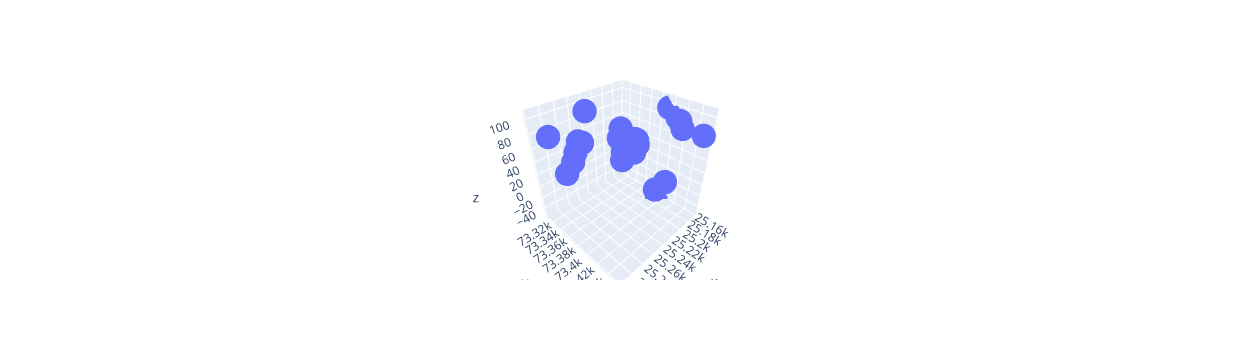

In [22]:
# plt.imshow(weights[0])
# plt.imshow(weights2[0])
sampled_points.shape

i = 0
t = 1

s = 0

px.scatter_3d(x = sampled_points[i, t, :, s + 0],  y = sampled_points[i, t, :, s + 1], z = sampled_points[i, t, :, s + 2])

In [26]:
n = 17
g = 3

list = np.arange(n)
for i in range(n // g + 1):
    print(list[i * g: (i + 1) * g])

[0 1 2]
[3 4 5]
[6 7 8]
[ 9 10 11]
[12 13 14]
[15 16]


In [42]:
from functools import partial
rng = random.PRNGKey(0)
rngs = random.split(rng, 10)

cloud = PointCloud(jnp.array(points_list[0]))

cluster = partial(k_means.k_means, geom=cloud, k=downsample_size)
cluster_rng = lambda rng : cluster(rng=rng)

jit(vmap(cluster_rng))(rngs)
# k_means.k_means(cloud, downsample_size)
# k_means.k_means(cloud, 10)
# cluster = jit(lambda cloud: k_means.k_means(cloud, downsample_size))

# def kmeans_downsample_points2(points_list, downsample_size, n_trials, pbar=False, rng=None):
#     rng = random.PRNGKey(0) if rng is None else rng
#     random.split(rng, num=n_trials)
#     dimension = points_list[0].shape[-1]
#     sampled_points = jnp.zeros([len(points_list), n_trials, downsample_size, dimension])
#     sampled_weights = jnp.zeros([len(points_list), n_trials, downsample_size])

#     progress_bar = (
#         tqdm(list(enumerate(points_list))) if pbar else enumerate(points_list)
#     )
    
#     cluster = jit(lambda cloud: k_means.k_means(cloud, downsample_size))
    
#     for i, point_cloud in progress_bar:
#         cluster_out = cluster(
#             jnp.array(points_list[i]), downsample_size, n_trials, pbar=False
#         )

#         sampled_points = sampled_points.at[i].set(centers)
#         sampled_weights = sampled_weights.at[i].set(weights)

#     return sampled_points, sampled_weights

KMeansOutput(centroids=Array([[[ 2.52278223e+04,  7.33899297e+04,  6.55359650e+01],
        [ 2.52982383e+04,  7.33524375e+04,  5.06745834e+01],
        [ 2.52065469e+04,  7.34003516e+04,  7.93828354e+01],
        ...,
        [ 2.51899570e+04,  7.33335781e+04,  7.79541931e+01],
        [ 2.52813789e+04,  7.33288672e+04,  1.07810431e+01],
        [ 2.52079688e+04,  7.33768359e+04,  6.46761169e+01]],

       [[ 2.52270020e+04,  7.33887266e+04,  6.63811646e+01],
        [ 2.52247207e+04,  7.33886875e+04,  6.58348236e+01],
        [ 2.51865820e+04,  7.34067500e+04,  8.70516205e+01],
        ...,
        [ 2.51942305e+04,  7.33185000e+04,  1.04709015e+02],
        [ 2.51633262e+04,  7.34268672e+04,  1.32889648e+02],
        [ 2.52021406e+04,  7.33220312e+04,  6.39327469e+01]],

       [[ 2.52273691e+04,  7.33881641e+04,  6.46088181e+01],
        [ 2.52241582e+04,  7.33828359e+04,  6.49993286e+01],
        [ 2.51736016e+04,  7.34125312e+04,  8.40334320e+01],
        ...,
        [ 2.5313560

In [19]:
func(jnp.array(points_list[0]))

KMeansOutput(centroids=Array([[ 2.52282695e+04,  7.33927500e+04,  6.50814056e+01],
       [ 2.52161680e+04,  7.33639453e+04,  6.38781509e+01],
       [ 2.51983320e+04,  7.33909531e+04,  9.26017685e+01],
       [ 2.51721523e+04,  7.33844688e+04, -6.23125801e+01],
       [ 2.52788984e+04,  7.33867500e+04,  7.08736038e+01],
       [ 2.52088164e+04,  7.34250078e+04,  9.05932617e+01],
       [ 2.52409473e+04,  7.33640156e+04,  3.57955437e+01],
       [ 2.52412539e+04,  7.33819141e+04,  9.26097946e+01],
       [ 2.52554668e+04,  7.34334453e+04,  7.58805618e+01],
       [ 2.52292266e+04,  7.33929453e+04, -5.09938049e+00],
       [ 2.52325059e+04,  7.34107422e+04,  4.27695465e+01],
       [ 2.52228594e+04,  7.33152656e+04,  9.09434433e+01],
       [ 2.52936230e+04,  7.34147734e+04,  4.29130783e+01],
       [ 2.52273945e+04,  7.34514844e+04,  1.16925865e+02],
       [ 2.51555293e+04,  7.33843906e+04,  9.37225418e+01],
       [ 2.51889863e+04,  7.34145469e+04,  2.93850174e+01],
       [ 2.532446